# #1.  With OHE and Scaling

In [786]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [787]:
# Read
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')
df.head()

Company Memory_Structure_Categories          Gpu_Type Gpu_Company  \
0    Asus                      Hybrid  GeForce GTX 1080      Nvidia   
1  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
2  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
3  Lenovo                      Hybrid  GeForce GTX 1070      Nvidia   
4  Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   

        OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0  Windows 10       Intel    17.3                    2.9           32   
1  Windows 10       Intel    17.3                    2.7           32   
2  Windows 10       Intel    17.3                    2.7           16   
3  Windows 10       Intel    17.3                    2.7           32   
4  Windows 10       Intel    17.3                    2.6           16   

   Size_Numeric  Weight_Numberic  Price_dollars  
0           512              4.7           4279  
1           512              4.6           3564  
2           256              4.6           3025  
3           256              4.6           2929  
4           128              4.6           2519

In [788]:
df = df.drop(["Gpu_Type"], axis=1)

In [789]:
df

Company Memory_Structure_Categories Gpu_Company       OpSys Cpu_Company  \
0        Asus                      Hybrid      Nvidia  Windows 10       Intel   
1      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
2      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
3      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
4      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
...       ...                         ...         ...         ...         ...   
1297  Samsung                         SSD       Intel  Windows 10       Intel   
1298   Lenovo                       Flash       Intel  Windows 10       Intel   
1299   Lenovo                       Flash       Intel     Android       Intel   
1300   Lenovo                       Flash       Intel  Windows 10       Intel   
1301   Lenovo                       Flash       Intel     Android       Intel   

      Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  
0                4.70           4279  
1                4.60           3564  
2                4.60           3025  
3                4.60           2929  
4                4.60           2519  
...               ...            ...  
1297             0.81           1649  
1298             0.69            711  
1299             0.69            604  
1300             0.69            527  
1301             0.69            351  

[1302 rows x 11 columns]

In [790]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df2.drop(["Price_dollars"], axis=1)
y = df2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [792]:
df2

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  Company_Acer  Company_Apple  \
0                4.70           4279             0              0   
1                4.60           3564             0              0   
2                4.60           3025             0              0   
3                4.60           2929             0              0   
4                4.60           2519             0              0   
...               ...            ...           ...            ...   
1297             0.81           1649             0              0   
1298             0.69            711             0              0   
1299             0.69            604             0              0   
1300             0.69            527             0              0   
1301             0.69            351             0              0   

      Company_Asus  Company_Chuwi  ...  Gpu_Company_Nvidia  OpSys_Android  \
0                1              0  ...                   1              0   
1                0              0  ...                   1              0   
2                0              0  ...                   1              0   
3                0              0  ...                   1              0   
4                0              0  ...                   1              0   
...            ...            ...  ...                 ...            ...   
1297             0              0  ...                   0              0   
1298             0              0  ...                   0              0   
1299             0              0  ...                   0              1   
1300             0              0  ...                   0              0   
1301             0              0  ...                   0              1   

      OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
0                   0            0               0            0   
1                   0            0               0            0   
2                   0            0               0            0   
3                   0            0               0            0   
4                   0            0               0            0   
...               ...          ...             ...          ...   
1297                0            0               0            0   
1298                0            0               0            0   
1299                0            0               0            0   
1300                0            0               0            0   
1301                0            0               0            0   

      OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
0                    1                   0                0            0  
1                    1                   0                0            0  
2                    1                   0                0            0  
3                    1                   0                0            0  
4                    1                   0                0            0  
...                ...                 ...              ...          ...  
1297                 1                   0                0            0  
1298                 1                   0            

In [791]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6977709309159265


In [606]:
y_pred = model.predict(X_test_scaled)
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'pctDiff': round(abs((y_pred-y_test)*100/y_test),1)})
result1

Actual  Predicted  pctDiff
1232     317      678.0    113.9
1030    2452     1438.0     41.4
163     1099     1250.0     13.7
1012    1216     1206.0      0.8
711      384     -140.0    136.5
...      ...        ...      ...
34      1098     1554.0     41.5
85       886      638.0     28.0
978      703     1002.0     42.5
156     2299     1574.0     31.5
697      736      834.0     13.3

[326 rows x 3 columns]

### notice the negative price values above.

#### "Linear regression does not respect the bounds of 0. It's linear, always and everywhere. It may not be appropriate for values that need to be close to 0 but are strictly positive." (https://stats.stackexchange.com/questions/145383/getting-negative-predicted-values-after-linear-regression)

In [607]:
result1[result1 < 0].count()

Actual       0
Predicted    3
pctDiff      0
dtype: int64

In [608]:
result1.pctDiff.mean()

33.43466257668712

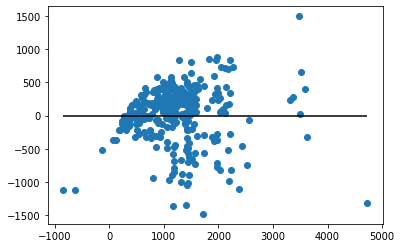

In [609]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

# #2. with OHE but no scaling

In [610]:
column_names_for_onehot = df[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
df_2 = pd.get_dummies(df, columns=column_names_for_onehot)
X = df_2.drop(["Price_dollars"], axis=1)
y = df_2["Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [611]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7234799509010785


In [612]:
y_pred2 = model.predict(X_test)
result2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2, 'pctDiff': round(abs((y_pred2-y_test)*100/y_test),1)})
result2

Actual    Predicted  pctDiff
1232     317   531.153640     67.6
1030    2452  1428.260408     41.8
163     1099  1262.143926     14.8
1012    1216  1048.179616     13.8
711      384    91.940561     76.1
...      ...          ...      ...
34      1098  1552.958563     41.4
85       886   641.126418     27.6
978      703   922.901852     31.3
156     2299  1556.761187     32.3
697      736   686.880166      6.7

[326 rows x 3 columns]

In [613]:
result2[result2 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [614]:
result2.pctDiff.mean()

29.607668711656437

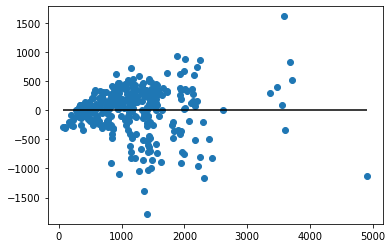

In [615]:
# Plot Residuals
plt.scatter(y_pred2, y_pred2 - y_test)
plt.hlines(y=0, xmin=y_pred2.min(), xmax=y_pred2.max())
plt.show()

# #3. without OHE but with scaling

In [616]:
df_3 = df.drop(["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"], axis=1)

In [617]:
df_3

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  
0                4.70           4279  
1                4.60           3564  
2                4.60           3025  
3                4.60           2929  
4                4.60           2519  
...               ...            ...  
1297             0.81           1649  
1298             0.69            711  
1299             0.69            604  
1300             0.69            527  
1301             0.69            351  

[1302 rows x 6 columns]

In [618]:
X = df_3.drop(["Price_dollars"], axis=1)
y = df_3["Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [619]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6397724832161193


In [620]:
y_pred3 = model.predict(X_test_scaled)
result3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3, 'pctDiff': round(abs((y_pred3-y_test)*100/y_test),1)})
result3

Actual    Predicted  pctDiff
1232     317   946.935780    198.7
1030    2452  1377.356679     43.8
163     1099  1120.720460      2.0
1012    1216   937.319603     22.9
711      384   559.413777     45.7
...      ...          ...      ...
34      1098  1883.577297     71.5
85       886   446.369618     49.6
978      703  1070.832128     52.3
156     2299  1431.348156     37.7
697      736   759.690662      3.2

[326 rows x 3 columns]

In [621]:
result3[result3 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [622]:
result3.pctDiff.mean()

37.533742331288344

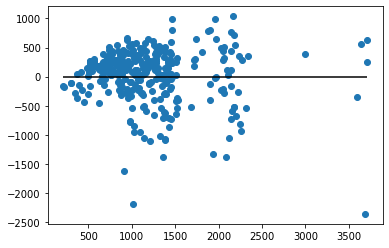

In [623]:
# Plot Residuals
plt.scatter(y_pred3, y_pred3 - y_test)
plt.hlines(y=0, xmin=y_pred3.min(), xmax=y_pred3.max())
plt.show()

# #4. without OHE and without scaling

In [778]:
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')
df_4 = df.drop(["Gpu_Type","Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"], axis=1)
df_4

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  
0                4.70           4279  
1                4.60           3564  
2                4.60           3025  
3                4.60           2929  
4                4.60           2519  
...               ...            ...  
1297             0.81           1649  
1298             0.69            711  
1299             0.69            604  
1300             0.69            527  
1301             0.69            351  

[1302 rows x 6 columns]

In [779]:
X = df_4.drop(["Price_dollars"], axis=1)
y = df_4["Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [780]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6397724832161189


In [781]:
y_pred4 = model.predict(X_test)
result4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4, 'pctDiff': round(abs((y_pred4-y_test)*100/y_test),1)})
result4

Actual    Predicted  pctDiff
1232     317   946.935780    198.7
1030    2452  1377.356679     43.8
163     1099  1120.720460      2.0
1012    1216   937.319603     22.9
711      384   559.413777     45.7
...      ...          ...      ...
34      1098  1883.577297     71.5
85       886   446.369618     49.6
978      703  1070.832128     52.3
156     2299  1431.348156     37.7
697      736   759.690662      3.2

[326 rows x 3 columns]

In [782]:
result4[result4 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [783]:
result4.pctDiff.mean()

37.533742331288344

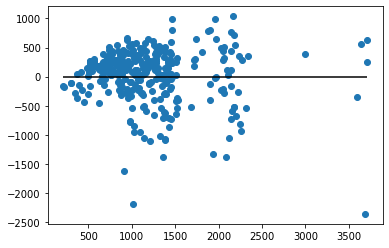

In [784]:
# Plot Residuals
plt.scatter(y_pred4, y_pred4 - y_test)
plt.hlines(y=0, xmin=y_pred4.min(), xmax=y_pred4.max())
plt.show()

In [785]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'pctDiff': round(abs((predictions-y_test)*100/y_test),1)})
result

result.pctDiff.mean()

22.92331288343558

# #5. Log-transformed data; with OHE and no scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208BF1B9F98>]],
      dtype=object)

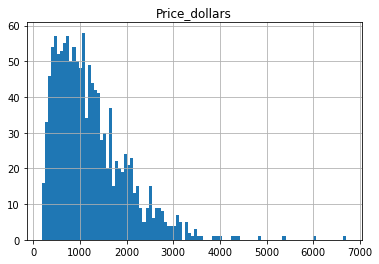

In [755]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

df.hist(column='Price_dollars', bins=100)

## Linear Regression Model: 


In [756]:
# excluding laptops that costs over 6000 dollars
# df = df[df['Price_dollars'] < 6000]


In [757]:

df.head()
df_5=df
df_5

Company Memory_Structure_Categories          Gpu_Type Gpu_Company  \
0        Asus                      Hybrid  GeForce GTX 1080      Nvidia   
1      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
2      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
3      Lenovo                      Hybrid  GeForce GTX 1070      Nvidia   
4      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
...       ...                         ...               ...         ...   
1297  Samsung                         SSD   HD Graphics 620       Intel   
1298   Lenovo                       Flash   HD Graphics 400       Intel   
1299   Lenovo                       Flash   HD Graphics 400       Intel   
1300   Lenovo                       Flash   HD Graphics 400       Intel   
1301   Lenovo                       Flash   HD Graphics 400       Intel   

           OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0     Windows 10       Intel    17.3                   2.90           32   
1     Windows 10       Intel    17.3                   2.70           32   
2     Windows 10       Intel    17.3                   2.70           16   
3     Windows 10       Intel    17.3                   2.70           32   
4     Windows 10       Intel    17.3                   2.60           16   
...          ...         ...     ...                    ...          ...   
1297  Windows 10       Intel    13.3                   2.50            8   
1298  Windows 10       Intel    10.1                   1.44            4   
1299     Android       Intel    10.1                   1.44            4   
1300  Windows 10       Intel    10.1                   1.44            4   
1301     Android       Intel    10.1                   1.44            4   

      Size_Numeric  Weight_Numberic  Price_dollars  
0              512             4.70           4279  
1              512             4.60           3564  
2              256             4.60           3025  
3              256             4.60           2929  
4              128             4.60           2519  
...            ...              ...            ...  
1297           256             0.81           1649  
1298            64             0.69            711  
1299            64             0.69            604  
1300            64             0.69            527  
1301            64             0.69            351  

[1302 rows x 12 columns]

In [758]:
import pandas as pd
import numpy as np
df_5['Log_Price_dollars'] = np.log(df_5['Price_dollars'])

In [759]:
df_5 = df_5.drop(["Price_dollars", "Gpu_Type"], axis=1)
df_5

Company Memory_Structure_Categories Gpu_Company       OpSys Cpu_Company  \
0        Asus                      Hybrid      Nvidia  Windows 10       Intel   
1      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
2      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
3      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
4      Lenovo                      Hybrid      Nvidia  Windows 10       Intel   
...       ...                         ...         ...         ...         ...   
1297  Samsung                         SSD       Intel  Windows 10       Intel   
1298   Lenovo                       Flash       Intel  Windows 10       Intel   
1299   Lenovo                       Flash       Intel     Android       Intel   
1300   Lenovo                       Flash       Intel  Windows 10       Intel   
1301   Lenovo                       Flash       Intel     Android       Intel   

      Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Log_Price_dollars  
0                4.70           8.361475  
1                4.60           8.178639  
2                4.60           8.014666  
3                4.60           7.982416  
4                4.60           7.831617  
...               ...                ...  
1297             0.81           7.407924  
1298             0.69           6.566672  
1299             0.69           6.403574  
1300             0.69           6.267201  
1301             0.69           5.860786  

[1302 rows x 11 columns]

In [760]:
column_names_for_onehot = df_5[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
column_names_for_onehot

Index(['Company', 'Cpu_Company', 'Memory_Structure_Categories', 'Gpu_Company',
       'OpSys'],
      dtype='object')

In [761]:
df_5 = pd.get_dummies(df_5, columns=column_names_for_onehot)
X = df_5.drop(["Log_Price_dollars"], axis=1)
y = df_5["Log_Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 42) (1302,)


In [762]:
X

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Company_Acer  Company_Apple  Company_Asus  \
0                4.70             0              0             1   
1                4.60             0              0             0   
2                4.60             0              0             0   
3                4.60             0              0             0   
4                4.60             0              0             0   
...               ...           ...            ...           ...   
1297             0.81             0              0             0   
1298             0.69             0              0             0   
1299             0.69             0              0             0   
1300             0.69             0              0             0   
1301             0.69             0              0             0   

      Company_Chuwi  Company_Dell  ...  Gpu_Company_Nvidia  OpSys_Android  \
0                 0             0  ...                   1              0   
1                 0             0  ...                   1              0   
2                 0             0  ...                   1              0   
3                 0             0  ...                   1              0   
4                 0             0  ...                   1              0   
...             ...           ...  ...                 ...            ...   
1297              0             0  ...                   0              0   
1298              0             0  ...                   0              0   
1299              0             0  ...                   0              1   
1300              0             0  ...                   0              0   
1301              0             0  ...                   0              1   

      OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
0                   0            0               0            0   
1                   0            0               0            0   
2                   0            0               0            0   
3                   0            0               0            0   
4                   0            0               0            0   
...               ...          ...             ...          ...   
1297                0            0               0            0   
1298                0            0               0            0   
1299                0            0               0            0   
1300                0            0               0            0   
1301                0            0               0            0   

      OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
0                    1                   0                0            0  
1                    1                   0                0            0  
2                    1                   0                0            0  
3                    1                   0                0            0  
4                    1                   0                0            0  
...                ...                 ...              ...          ...  
1297                 1                   0                0            0  
1298                 1                   0                0       

In [763]:
y = df_5["Log_Price_dollars"]
y

0       8.361475
1       8.178639
2       8.014666
3       7.982416
4       7.831617
          ...   
1297    7.407924
1298    6.566672
1299    6.403574
1300    6.267201
1301    5.860786
Name: Log_Price_dollars, Length: 1302, dtype: float64

In [764]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7609624880867477


In [765]:
y_pred5 = model.predict(X_test)
result5 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred5), 'pctDiff': round(abs((np.exp(y_pred5)-np.exp(y_test))*100/np.exp(y_test)),1)})
result5

Actual    Predicted  pctDiff
1232   317.0   412.625542     30.2
1030  2452.0  1336.423831     45.5
163   1099.0  1084.621291      1.3
1012  1216.0  1054.828357     13.3
711    384.0   343.988549     10.4
...      ...          ...      ...
34    1098.0   908.535309     17.3
85     886.0   608.466302     31.3
978    703.0   882.247940     25.5
156   2299.0  1441.977808     37.3
697    736.0   709.885861      3.5

[326 rows x 3 columns]

In [766]:
result5[result5 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [767]:
result5.pctDiff.mean()

25.1659509202454

In [643]:
np.exp(y_test).max()

5389.000000000004

In [644]:
np.exp(y_pred5).max()

4920.722757178364

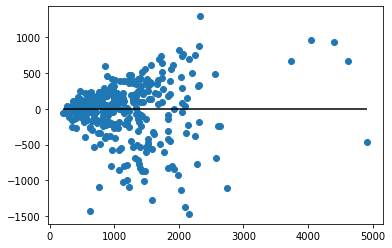

In [645]:
# Plot Residuals
plt.scatter(np.exp(y_pred5), np.exp(y_pred5) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred5).min(), xmax=np.exp(y_pred5).max())
plt.show()

# The lienar model is usually underestimating how much something costs

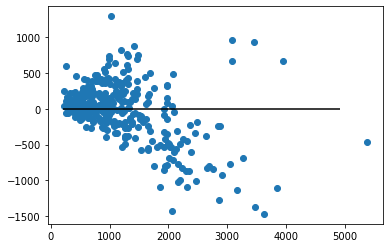

In [646]:
# Plot Residuals-like plot
plt.scatter(np.exp(y_test), np.exp(y_pred5) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred5).min(), xmax=np.exp(y_pred5).max())
plt.show()

In [647]:
result5a = pd.DataFrame(list(zip(model.coef_, X)))
result5a = result5a.sort_values(0)
result5a.columns = ['Coefficient','Weights']
result5a

Coefficient                             Weights
17    -0.623114                    Company_Mediacom
22    -0.525355                        Company_Vero
26    -0.418055   Memory_Structure_Categories_Flash
8     -0.330366                       Company_Chuwi
10    -0.306895                     Company_Fujitsu
37    -0.277754                         OpSys_No OS
5     -0.276273                        Company_Acer
33    -0.269984                       OpSys_Android
24    -0.223892                     Cpu_Company_AMD
35    -0.187310                         OpSys_Linux
39    -0.179435                  OpSys_Windows 10 S
7     -0.116835                        Company_Asus
15    -0.113968                      Company_Lenovo
27    -0.106761     Memory_Structure_Categories_HDD
0     -0.069414                              Inches
30    -0.063464                     Gpu_Company_AMD
41    -0.042111                         OpSys_macOS
34    -0.040542                     OpSys_Chrome OS
31    -0.038707                   Gpu_Company_Intel
20    -0.038229                     Company_Samsung
9     -0.017699                        Company_Dell
21    -0.016260                     Company_Toshiba
12    -0.004514                          Company_HP
16    -0.000494                         Company_MSI
3      0.000099                        Size_Numeric
4      0.007897                     Weight_Numberic
19     0.019368                       Company_Razer
13     0.023826                      Company_Huawei
2      0.046175                         Ram_Numeric
38     0.071055                    OpSys_Windows 10
32     0.102170                  Gpu_Company_Nvidia
25     0.223892                   Cpu_Company_Intel
29     0.248527     Memory_Structure_Categories_SSD
28     0.276289  Memory_Structure_Categories_Hybrid
1      0.285396               CPU_Frequency_Numeric
23     0.396836                      Company_Xiaomi
6      0.441430                       Company_Apple
40     0.442541                     OpSys_Windows 7
18     0.462730                   Company_Microsoft
14     0.474863                          Company_LG
36     0.483541                      OpSys_Mac OS X
11     0.550950                      Company_Google

In [648]:
print(model.intercept_)

6.571222217011981


# RF regressor model
### exclude laptops that cost >= 6000

In [695]:
# Read

csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')

In [696]:
df = df[df['Price_dollars'] < 6000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208BEEDD438>]],
      dtype=object)

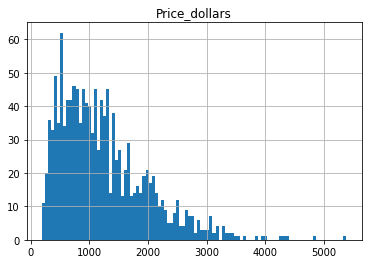

In [697]:
df_5 = df
df.hist(column='Price_dollars', bins=100)

In [698]:
import pandas as pd
import numpy as np
df_5['Log_Price_dollars'] = np.log(df_5['Price_dollars'])
df_5

Company Memory_Structure_Categories          Gpu_Type Gpu_Company  \
0        Asus                      Hybrid  GeForce GTX 1080      Nvidia   
1      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
2      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
3      Lenovo                      Hybrid  GeForce GTX 1070      Nvidia   
4      Lenovo                      Hybrid  GeForce GTX 980M      Nvidia   
...       ...                         ...               ...         ...   
1297  Samsung                         SSD   HD Graphics 620       Intel   
1298   Lenovo                       Flash   HD Graphics 400       Intel   
1299   Lenovo                       Flash   HD Graphics 400       Intel   
1300   Lenovo                       Flash   HD Graphics 400       Intel   
1301   Lenovo                       Flash   HD Graphics 400       Intel   

           OpSys Cpu_Company  Inches  CPU_Frequency_Numeric  Ram_Numeric  \
0     Windows 10       Intel    17.3                   2.90           32   
1     Windows 10       Intel    17.3                   2.70           32   
2     Windows 10       Intel    17.3                   2.70           16   
3     Windows 10       Intel    17.3                   2.70           32   
4     Windows 10       Intel    17.3                   2.60           16   
...          ...         ...     ...                    ...          ...   
1297  Windows 10       Intel    13.3                   2.50            8   
1298  Windows 10       Intel    10.1                   1.44            4   
1299     Android       Intel    10.1                   1.44            4   
1300  Windows 10       Intel    10.1                   1.44            4   
1301     Android       Intel    10.1                   1.44            4   

      Size_Numeric  Weight_Numberic  Price_dollars  Log_Price_dollars  
0              512             4.70           4279           8.361475  
1              512             4.60           3564           8.178639  
2              256             4.60           3025           8.014666  
3              256             4.60           2929           7.982416  
4              128             4.60           2519           7.831617  
...            ...              ...            ...                ...  
1297           256             0.81           1649           7.407924  
1298            64             0.69            711           6.566672  
1299            64             0.69            604           6.403574  
1300            64             0.69            527           6.267201  
1301            64             0.69            351           5.860786  

[1300 rows x 13 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208BF063DA0>]],
      dtype=object)

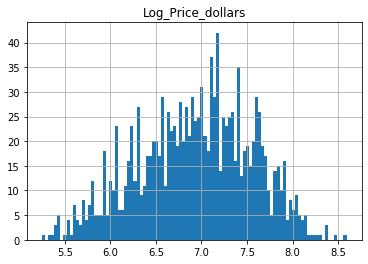

In [699]:
df_5 = df_5.drop(["Price_dollars", "Gpu_Type"], axis=1)
df_5
df_5.hist(column='Log_Price_dollars', bins=100)

In [700]:
column_names_for_onehot = df_5[["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys"]].columns[0:]
column_names_for_onehot

Index(['Company', 'Cpu_Company', 'Memory_Structure_Categories', 'Gpu_Company',
       'OpSys'],
      dtype='object')

In [701]:
df_5 = pd.get_dummies(df_5, columns=column_names_for_onehot)
X = df_5.drop(["Log_Price_dollars"], axis=1)
y = df_5["Log_Price_dollars"]
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1300, 42) (1300,)


In [702]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

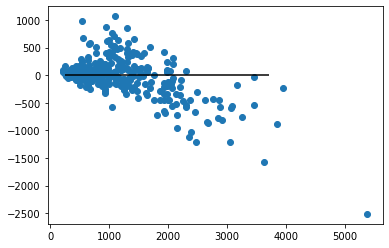

In [703]:
plt.scatter(np.exp(y_test), np.exp(predictions) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(predictions).min(), xmax=np.exp(predictions).max())
plt.show()

In [704]:
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(predictions), 'pctDiff': round(abs((np.exp(predictions)-np.exp(y_test))*100/np.exp(y_test)),1)})
result

Actual    Predicted  pctDiff
1111   989.0  1327.810164     34.3
372    471.0   493.291471      4.7
574    684.0   668.183232      2.3
241    862.0   787.063875      8.7
135   2255.0  1793.392250     20.5
...      ...          ...      ...
34    1098.0  2167.135973     97.4
87     725.0   802.864311     10.7
978    703.0   791.506778     12.6
158    879.0  1044.770484     18.9
665   1474.0  1187.748639     19.4

[325 rows x 3 columns]

In [705]:
result.pctDiff.mean()

19.34307692307692

# #6 Log-transformed data; without OHE (remove all categorical variables) and no scaling

In [706]:
csv_path = "Laptops_Data_clean.csv"
df = pd.read_csv(csv_path,encoding='latin-1')
df_6 = df.drop(["Company","Cpu_Company","Memory_Structure_Categories","Gpu_Company","OpSys", "Gpu_Type"], axis=1)
df_6

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Price_dollars  
0                4.70           4279  
1                4.60           3564  
2                4.60           3025  
3                4.60           2929  
4                4.60           2519  
...               ...            ...  
1297             0.81           1649  
1298             0.69            711  
1299             0.69            604  
1300             0.69            527  
1301             0.69            351  

[1302 rows x 6 columns]

In [659]:
import pandas as pd
import numpy as np
df_6['Log_Price_dollars'] = np.log(df_6['Price_dollars'])

In [660]:
df_6 = df_6.drop(["Price_dollars"], axis=1)
df_6

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
0       17.3                   2.90           32           512   
1       17.3                   2.70           32           512   
2       17.3                   2.70           16           256   
3       17.3                   2.70           32           256   
4       17.3                   2.60           16           128   
...      ...                    ...          ...           ...   
1297    13.3                   2.50            8           256   
1298    10.1                   1.44            4            64   
1299    10.1                   1.44            4            64   
1300    10.1                   1.44            4            64   
1301    10.1                   1.44            4            64   

      Weight_Numberic  Log_Price_dollars  
0                4.70           8.361475  
1                4.60           8.178639  
2                4.60           8.014666  
3                4.60           7.982416  
4                4.60           7.831617  
...               ...                ...  
1297             0.81           7.407924  
1298             0.69           6.566672  
1299             0.69           6.403574  
1300             0.69           6.267201  
1301             0.69           5.860786  

[1302 rows x 6 columns]

In [661]:
X = df_6.drop(["Log_Price_dollars"], axis=1)
y = df_6["Log_Price_dollars"]
print(X.shape, y.shape)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

(1302, 5) (1302,)
(1302, 5) (1302,)


In [662]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6076546331167317


In [663]:
y_pred6 = model.predict(X_test)
result6 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(y_pred6), 'pctDiff': round(abs((np.exp(y_pred6)-np.exp(y_test))*100/np.exp(y_test)),1)})
result6

Actual    Predicted  pctDiff
1232   317.0   792.969360    150.1
1030  2452.0  1256.853454     48.7
163   1099.0   894.009600     18.7
1012  1216.0   889.435950     26.9
711    384.0   585.811052     52.6
...      ...          ...      ...
34    1098.0  1413.054542     28.7
85     886.0   493.456151     44.3
978    703.0   934.686446     33.0
156   2299.0  1268.213002     44.8
697    736.0   751.349724      2.1

[326 rows x 3 columns]

In [664]:
result6[result6 < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [665]:
result6.pctDiff.mean()

34.62116564417178

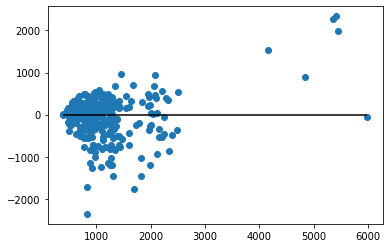

In [666]:
# Plot Residuals
plt.scatter(np.exp(y_pred6), np.exp(y_pred6) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(y_pred6).min(), xmax=np.exp(y_pred6).max())
plt.show()

# RF regressor test

In [667]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [668]:
X_test

Inches  CPU_Frequency_Numeric  Ram_Numeric  Size_Numeric  \
1232    11.6                    1.6            4            16   
1030    14.0                    2.5            8           256   
163     15.6                    2.5            8          1000   
1012    14.0                    2.3            4           128   
711     15.6                    1.8            4           500   
...      ...                    ...          ...           ...   
34      17.3                    2.6           16          1000   
85      17.3                    1.6            4           256   
978     13.3                    2.5            6          1000   
156     15.6                    2.9            8           256   
697     15.6                    2.4            4           500   

      Weight_Numberic  
1232             1.20  
1030             1.43  
163              2.65  
1012             1.47  
711              2.00  
...               ...  
34               4.00  
85               3.00  
978              1.50  
156              2.67  
697              2.00  

[326 rows x 5 columns]

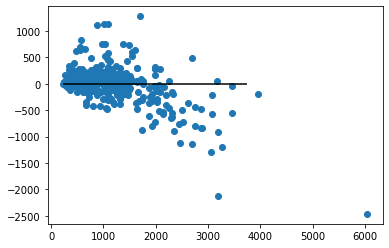

In [669]:
plt.scatter(np.exp(y_test), np.exp(predictions) - np.exp(y_test))
plt.hlines(y=0, xmin=np.exp(predictions).min(), xmax=np.exp(predictions).max())
plt.show()

In [670]:
result = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(predictions), 'pctDiff': round(abs((np.exp(predictions)-np.exp(y_test))*100/np.exp(y_test)),1)})
result

Actual    Predicted  pctDiff
1232   317.0   367.777351     16.0
1030  2452.0  1694.155193     30.9
163   1099.0   943.856179     14.1
1012  1216.0  1111.612631      8.6
711    384.0   542.102222     41.2
...      ...          ...      ...
34    1098.0  2234.616673    103.5
85     886.0   682.377746     23.0
978    703.0   791.381271     12.6
156   2299.0  1649.516654     28.3
697    736.0   575.897974     21.8

[326 rows x 3 columns]

In [671]:
result[result < 0].count()

Actual       0
Predicted    0
pctDiff      0
dtype: int64

In [672]:
result.pctDiff.mean()

21.482208588957057